## Getting Started with PyGAD - Fitting a Linear Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pygad
import numpy as np
print(pygad.__version__)

2.16.0


In [2]:
function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

In [3]:
def fitness_func(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.power(output - desired_output, 2)
    return fitness

In [4]:
num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = len(function_inputs)

In [5]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes)

In [6]:
ga_instance.run()

In [7]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 1.45520312 -1.37711585 -3.84918461  3.35748189 -3.37184249  1.06143304]
Fitness value of the best solution = 15016.603239299195
Predicted output based on the best solution : 43.99183954927219


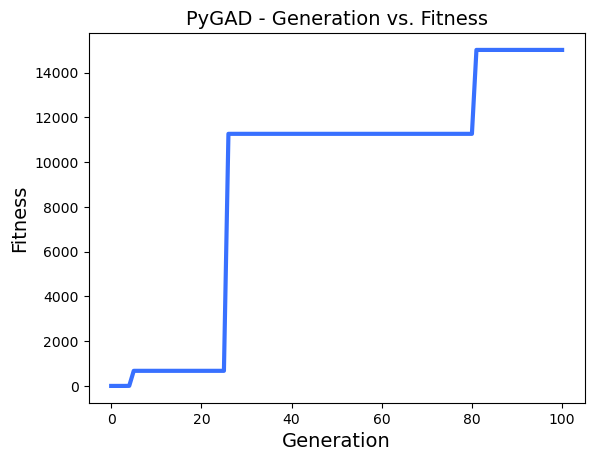

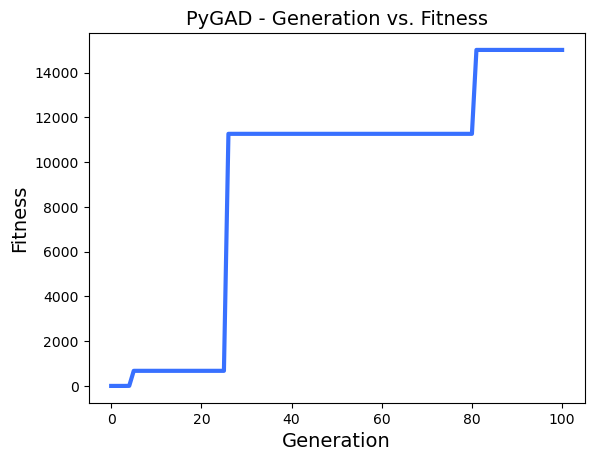

In [8]:
ga_instance.plot_result()

## Training Neural Networks

In [9]:
# Preparing the NumPy array of the inputs.
data_inputs = np.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

# Preparing the NumPy array of the outputs.
data_outputs = np.array([0, 
                            1, 
                            1, 
                            0])

In [10]:
num_neurons_input = 2
num_neurons_output = 2
num_neurons_hidden_layers = [2]
hidden_activations=["relu"]
output_activation = "softmax"
num_solutions = 5

In [11]:
import pygad.gann

GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=1,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [12]:
ga_instance.run()

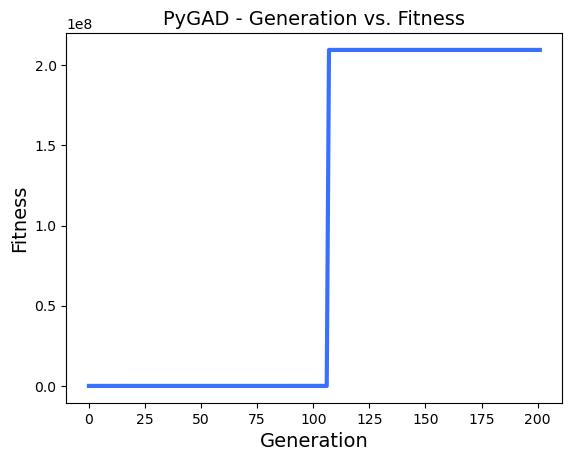

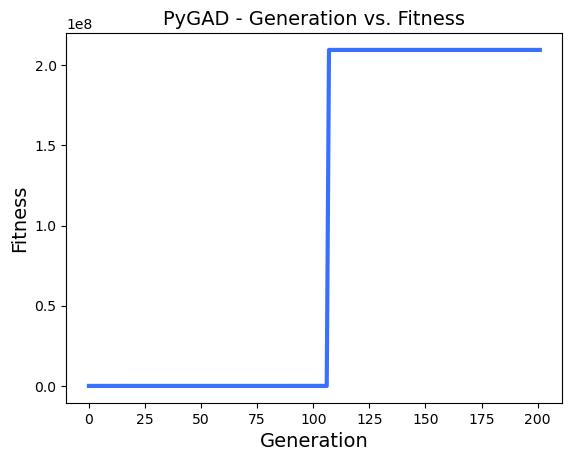

In [13]:
ga_instance.plot_result()

In [14]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[ 1.46303345 -1.73764167 -3.75515303  3.14280346 -3.37184249  1.06143304]
209483594.30127692
0


In [15]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
print(population_vectors)

[array([ 0.08536968, -0.07067894, -0.07456735,  0.04938526, -0.08970296,
       -0.06579404]), array([-0.05096088,  0.06847722, -0.08363867,  0.00995338, -0.08365608,
        0.04888741]), array([ 0.09914552, -0.03545855, -0.00224287, -0.0593146 , -0.08836927,
        0.02867623]), array([ 0.00164818,  0.0299268 , -0.07629716,  0.07011589,  0.01445154,
        0.0393193 ]), array([-0.01967315,  0.09708153, -0.05670036, -0.08086256,  0.08810672,
       -0.08773461])]


In [16]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                              problem_type="classification")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

Predictions of the trained network : [0, 0, 0, 0]
